# Telecommunications Dataset Brief

Given a telecomunnications dataset, the company would like to know which customers are likely to leave (churn). A plan also needs to be developed in an attempt to keep customers from leaving/churning.

# Load Libraries

In [0]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'w'

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

# Telecommunications Dataset

## Context, Scenario, Business Notes

I would be interested in doing a dataset on customer retention. As someone who has done customer service jobs in retail and educational services, this dataset would be of interest to me.

* Presentation and analyses is for a marketing and operations team.

* Telco profits are mostly from cellular plans and overage fees.

* In a competitive telco market, customers can easily switch service providers as they may think the grass is greener on the other side. A loyal customer helps with maintaining cash flows and gaining market share on its competition.

Customer rentention models can help indentify customers who are likely to leave and maybe switch to another service provider. 

Reasons for a customer leaving can be due to:

* poor customer service
* price (hikes)
* Better offer somewhere else
* Other (cut expenses, death)

In [0]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'w'

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load data:

telco_data = pd.read_csv("/content/drive/My Drive/Telco-Customer-Churn.csv")

telco_data.head(12)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


At a first glance, I think these variables are important (in the business context):

* MonthlyCharges
* TotalCharges (cumulative amount paid from customer)
* Contract
* Churn** (**target**) 
* tenure (number of months)
* Gender (I think women use the phone more than guys but I need studies to support the claim.)

and maybe:

* Partner
* Dependents
* MultipleLines
* Senior Citizen

In [0]:
# Data info, look at data types

telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## First Looks At Data - Exploratory Data Analysis

### Looking at Columns: Partner, Dependents, Senior Citizen & MultipleLines

Checking to see if maybe there is useful information.

In [0]:
# Look at Partner, Dependents, Senior Citizen & MultpleLines

# Partner
telco_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [0]:
# Dependents:

telco_data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [0]:
# Multiple Lines:

telco_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [0]:
# Senior Citizen, turns out not a whole lot of senior citizens.

print(telco_data['SeniorCitizen'].value_counts())
print(telco_data['SeniorCitizen'].value_counts(normalize= True))

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64


In [0]:
# Gender value counts:

telco_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

With the variables:

* Partner
* Dependents
* MultipleLines
* Senior Citizen

there may be some neat findings but it does not seem convincing when looking at value counts.

On second thought, don't discriminate on gender. 

---

I want to look more on variables such as tenure (customer time in month) and their monthly amounts.

### Looking At Tenure Variable

In [0]:
# Look at tenure:

telco_data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Mean (average) tenure for all customers is just over 32 months. The median tenure is 29 months.

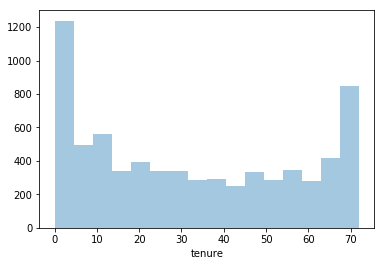

In [0]:
# Distribution of tenure for all customers

sns.distplot(telco_data['tenure'], kde = False)

The distribution of tenure times in months here is bimodal. More than 1200 customers have a tenure of about 0 to 4 months. The second mode is the longtime customers with about 70 months of tenure.

In [0]:
# Value counts for contract

telco_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [0]:
# Summary statistics of tenure column for those who did Churn

telco_data[telco_data['Churn'] == 'Yes']['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

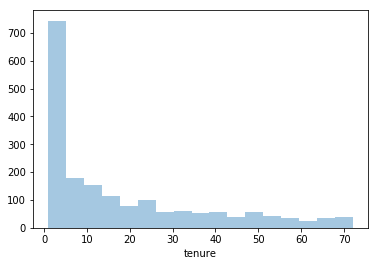

In [0]:
# Customer Time Length of Customers who did churn.

sns.distplot(telco_data[telco_data['Churn'] == 'Yes']['tenure'], kde = False)

#telco_data[telco_data['Churn'] == 'Yes']['tenure']

In [0]:
# Number Of Month-To-Month customers who churned in dataset:

telco_data[(telco_data['Churn'] == 'Yes') & (telco_data['Contract'] == 'Month-to-month')].count()

customerID          1655
gender              1655
SeniorCitizen       1655
Partner             1655
Dependents          1655
tenure              1655
PhoneService        1655
MultipleLines       1655
InternetService     1655
OnlineSecurity      1655
OnlineBackup        1655
DeviceProtection    1655
TechSupport         1655
StreamingTV         1655
StreamingMovies     1655
Contract            1655
PaperlessBilling    1655
PaymentMethod       1655
MonthlyCharges      1655
TotalCharges        1655
Churn               1655
dtype: int64

In [0]:
# Number Of One Year customers who churned in dataset:

telco_data[(telco_data['Churn'] == 'Yes') & (telco_data['Contract'] == 'One year')].count()

customerID          166
gender              166
SeniorCitizen       166
Partner             166
Dependents          166
tenure              166
PhoneService        166
MultipleLines       166
InternetService     166
OnlineSecurity      166
OnlineBackup        166
DeviceProtection    166
TechSupport         166
StreamingTV         166
StreamingMovies     166
Contract            166
PaperlessBilling    166
PaymentMethod       166
MonthlyCharges      166
TotalCharges        166
Churn               166
dtype: int64

In [0]:
# Number Of Two Year customers who churned in dataset:

telco_data[(telco_data['Churn'] == 'Yes') & (telco_data['Contract'] == 'Two year')].count()

customerID          48
gender              48
SeniorCitizen       48
Partner             48
Dependents          48
tenure              48
PhoneService        48
MultipleLines       48
InternetService     48
OnlineSecurity      48
OnlineBackup        48
DeviceProtection    48
TechSupport         48
StreamingTV         48
StreamingMovies     48
Contract            48
PaperlessBilling    48
PaymentMethod       48
MonthlyCharges      48
TotalCharges        48
Churn               48
dtype: int64

In [0]:
# Customers With 0 Tenure:

telco_data[telco_data['tenure'] == 0].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

#### Survival Analysis Approach Experiment - Kaplan Meier Curve For Churn Times For Contract Groups

When it comes to time to event data such as customer churn and the like, I think of a Kaplan-Meier survival curve from the statistical field Survival Analysis. 

This Kaplan-Meier survival curve looks at the people leaving (customer churn) and the remaining customers over time (tenure).

The statistical field of survival analysis involves time to event data.

* Tenure: Customer service time (months)
* Event Of Interest: Churn (Yes/ True)
* Kaplan-Meier survival curve visualization for customer churn by contract.
* Survival curve estimates the probability of the customer staying (non-churn) past a point in time.

&nbsp;

[Survival Analysis Python Reference](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html)

---

Given a customer's time with the business $C$, the survival function of a population $S(t)$ is the probability of the customer time $C$ being greater than some point in time $t$.

$$S(t) = P(C > t)$$

&nbsp;

The survival function is related to the cumulative distribution function $F(t)$. This formula holds true.

$$S(t) = 1 - F(t) = 1 - P(C \leq t)$$


In [0]:
pip install lifelines

     |████████████████████████████████| 348kB 9.6MB/s 


In [0]:
# Ref: https://lifelines.readthedocs.io/en/latest/Quickstart.html
# Ref 2: https://plot.ly/ipython-notebooks/survival-analysis-r-vs-python/
# Use lifelines library for survival analysis.

from lifelines import KaplanMeierFitter

##### Overall Churn

In [0]:
# Set variables for Kaplan-Meier survival curve:

time_km = telco_data['tenure']
churn_km = telco_data['Churn'].apply(lambda x: True if x == 'Yes' else False)

In [0]:
# Check churn_km

churn_km.head()

0    False
1    False
2     True
3    False
4     True
Name: Churn, dtype: bool

**How Many Customers Churn**

In [0]:
# Number of customers in dataset

churn_km.count()

7043

In [0]:
# 1869 out of 7043

churn_km.value_counts()

False    5174
True     1869
Name: Churn, dtype: int64

In [0]:
churn_km.value_counts(normalize = True)

False    0.73463
True     0.26537
Name: Churn, dtype: float64

There are 1869 customers who churn from the 7043 customers in the dataset. This is about 26.5 percent of 7043.

In [0]:
# Median & mean tenure:

print(f'Median tenure: {np.median(time_km)}')
print(f'Mean tenure: {np.mean(time_km)}')

Median tenure: 29.0
Mean tenure: 32.37114865824223


In [0]:
# Fit Kaplan Meier Curve

kmf = KaplanMeierFitter()
kmf.fit(time_km, event_observed = churn_km)

<lifelines.KaplanMeierFitter: fitted with 7043 total observations, 5174 right-censored observations>

/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:287: FutureWarning: Please use `median_survival_time_` property instead. Future property `median_` will be removed.
  FutureWarning,


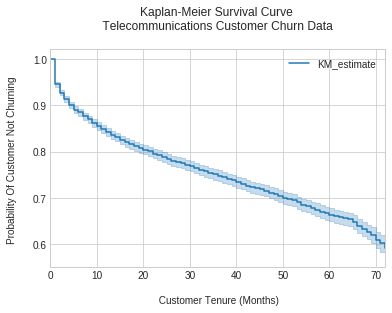

In [0]:
# Plot Of Tenure Time For All Customers

# Set style:

plt.style.use('seaborn-whitegrid')

kmf.survival_function_
kmf.cumulative_density_
kmf.median_

kmf.plot_survival_function() # or just kmf.plot()

# Median line:
#plt.axvline(x = np.median(time_km), color = 'green', alpha = 0.3)

# Mean line:
#plt.axvline(x = np.mean(time_km), color = 'black', alpha = 0.2)

# Look at 12 months and 24 months tenure (1 yr and 2 yr contracts)

#plt.axvline(x = 12, color = 'black', alpha = 0.2)

#plt.axvline(x = 24, color = 'black', alpha = 0.2)



plt.xlabel('\n Customer Tenure (Months)')
plt.ylabel('Probability Of Customer Not Churning \n')
plt.title('Kaplan-Meier Survival Curve \n Telecommunications Customer Churn Data \n')

plt.savefig('overallChurn.png', dpi=300, bbox_inches = "tight")

**Observations**

* It appears that after 12 months, there is a 15% chance of the customers leaving. 
* After 20 months there is a 80% chance of non-churn or a 20% chance of the customer leaving.

##### By Contract Type

In [0]:
# Filtered data for Kaplan-Meier

telco_km = telco_data[['Contract', 'tenure', 'Churn']]

In [0]:
# Check:

telco_km.tail(5)

,Contract,tenure,Churn
7038,One year,24,No
7039,One year,72,No
7040,Month-to-month,11,No
7041,Month-to-month,4,Yes
7042,Two year,66,No


In [0]:
# Filter by contract:

telco_km_mthmth = telco_km[telco_km['Contract'] == 'Month-to-month']

telco_km_oneyear = telco_km[telco_km['Contract'] == 'One year']

telco_km_twoyear = telco_km[telco_km['Contract'] == 'Two year']

**Month To Month Tenure**

In [0]:
mthmth_tenure = telco_km_mthmth['tenure']

mthmth_tenure.head()

0     1
2     2
4     2
5     8
6    22
Name: tenure, dtype: int64

In [0]:
# Number of Month To Month customers:


telco_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [0]:
# Change Yes and No to True & False:

churn_mthmth = telco_km_mthmth['Churn'].apply(lambda x: True if x == 'Yes' else False)

churn_mthmth.head()

0    False
2     True
4     True
5     True
6    False
Name: Churn, dtype: bool

In [0]:
mthmth_tenure.describe()

count    3875.000000
mean       18.036645
std        17.689054
min         1.000000
25%         3.000000
50%        12.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [0]:
churn_mthmth.sum()

1655

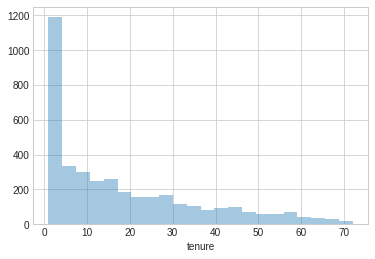

In [0]:
# Distribution Plot of month to month tenure:

sns.distplot(mthmth_tenure, kde = False)
#plt.xticks(range(0, 75, 6))

In [0]:
# Kaplan-Meier Survival Curve For Month To Month

#ax = plt.subplot(111)

#kmf_catg.fit(mthmth_tenure , churn_mthmth, label = 'Month-To-Month')
#kmf_catg.survival_function_.plot(ax=ax)
                                 
#kmf2 = plt.gcf()

In [0]:
# Obtain tenure times and Churn events from one year contracts and two year contracts:

oneyear_tenure = telco_km_oneyear['tenure']
churn_oneyear = telco_km_oneyear['Churn'].apply(lambda x: True if x == 'Yes' else False)

twoyear_tenure = telco_km_twoyear['tenure']
churn_twoyear = telco_km_twoyear['Churn'].apply(lambda x: True if x == 'Yes' else False)

In [0]:
churn_oneyear.head()

1     False
3     False
9     False
12    False
16    False
Name: Churn, dtype: bool

**Kaplan-Meier Curve For All Three Contracts**

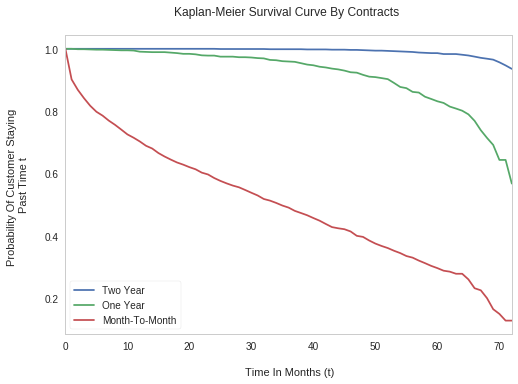

In [0]:
# Fit Kaplan Meier Curve
# Removed grid and added legend frame after presentation

# Set style:

plt.style.use('seaborn-whitegrid')

kmf_catg = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_catg.fit(twoyear_tenure, churn_twoyear, label = 'Two Year')
kmf_catg.survival_function_.plot(ax=ax)

kmf_catg.fit(oneyear_tenure , churn_oneyear, label = 'One Year')
kmf_catg.survival_function_.plot(ax=ax)

kmf_catg.fit(mthmth_tenure , churn_mthmth, label = 'Month-To-Month')
kmf_catg.survival_function_.plot(ax=ax)

plt.title('Kaplan-Meier Survival Curve By Contracts \n')
plt.xlabel('\n Time In Months (t)')
plt.ylabel('Probability Of Customer Staying \n Past Time t \n')
plt.legend(frameon = True)
plt.grid()

plt.savefig('Churn_byContract.png', dpi=300, bbox_inches = "tight")

This Kaplan-Meier survival curve turned out very nicely in terms of comparing groups. It can be easily be seen that over time that month-to-month customers are more likely to leave compared to the one-year and two-year contracts.


**Month-To-Month Contracts Analysis**

* It appears that 40% of month-to-month customers do churn by the 20th month. 

* About 25% of month-to-month customers churn by the 10th month.

In [0]:
# 40% Of The Number Of Month-To-Month Customers:
# Represents number of loss customers by month 20

0.4 * 3875 

1550.0

In [0]:
# 25% Of The Number Of Month-To-Month Customers:
# Represents number of loss customers by month 10

0.25 * 3875 

968.75

In [0]:
telco_data[(telco_data['Contract'] == 'Month-to-month') & (telco_data['tenure'] > 10)].count()

customerID          2047
gender              2047
SeniorCitizen       2047
Partner             2047
Dependents          2047
tenure              2047
PhoneService        2047
MultipleLines       2047
InternetService     2047
OnlineSecurity      2047
OnlineBackup        2047
DeviceProtection    2047
TechSupport         2047
StreamingTV         2047
StreamingMovies     2047
Contract            2047
PaperlessBilling    2047
PaymentMethod       2047
MonthlyCharges      2047
TotalCharges        2047
Churn               2047
dtype: int64

In [0]:
telco_data[(telco_data['Contract'] == 'Month-to-month') & (telco_data['tenure'] <= 10)].count()

customerID          1828
gender              1828
SeniorCitizen       1828
Partner             1828
Dependents          1828
tenure              1828
PhoneService        1828
MultipleLines       1828
InternetService     1828
OnlineSecurity      1828
OnlineBackup        1828
DeviceProtection    1828
TechSupport         1828
StreamingTV         1828
StreamingMovies     1828
Contract            1828
PaperlessBilling    1828
PaymentMethod       1828
MonthlyCharges      1828
TotalCharges        1828
Churn               1828
dtype: int64

#### Estimate Hazard Rates - Nelson Allen Fitter (Experimental)

Reference: https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

Hazard function is the probability of the churn event occurring at time t, given churn has not occurred until time $t$.

          NA_estimate
timeline             
0.0          0.000000
1.0          0.103198
2.0          0.140886
3.0          0.172279
4.0          0.201468
5.0          0.225207
6.0          0.240971
7.0          0.261484
8.0          0.279089
9.0          0.299305


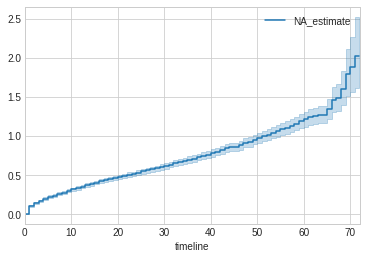

In [0]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(mthmth_tenure , event_observed = churn_mthmth)

print(naf.cumulative_hazard_.head(10))
naf.plot()

Rate of change of cumulative hazard function is the pointwise hazard function. Appears that greatest change in churn is from 65 to 74 months of customer tenure.

#### Looking At Churns Over Time

Want to look at number of churns over tenure time (months) for each contract.

1. Month-To-Month (`telco_km_mthmth`)
2. One Year (`telco_km_oneyear`)
3. Two Year (`telco_km_twoyear`)

##### Month-To-Month

In [0]:
# Monthly contract customers

telco_km_mthmth.head()

,Contract,tenure,Churn
0,Month-to-month,1,No
2,Month-to-month,2,Yes
4,Month-to-month,2,Yes
5,Month-to-month,8,Yes
6,Month-to-month,22,No


In [0]:
# 1) Churned numbers for month-to-month customers

telco_monthly_churn = telco_km_mthmth[telco_km_mthmth['Churn'] == 'Yes']

telco_monthly_churn.head()

,Contract,tenure,Churn
2,Month-to-month,2,Yes
4,Month-to-month,2,Yes
5,Month-to-month,8,Yes
8,Month-to-month,28,Yes
13,Month-to-month,49,Yes


In [0]:
telco_monthly_churn.count()

Contract    1655
tenure      1655
Churn       1655
dtype: int64

In [0]:
# Month-to-month churn counts
monthly_churn_counts =  telco_monthly_churn.groupby(['tenure'])['Churn'].count()

In [0]:
# Churn counts by month:

monthly_churn_counts.head(10)

tenure
1     380
2     121
3      94
4      82
5      63
6      40
7      50
8      41
9      45
10     45
Name: Churn, dtype: int64

In [0]:
# Total churn counts:

monthly_churn_counts.sum()

1655

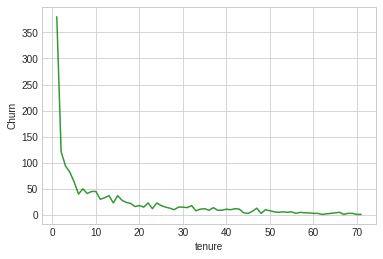

In [0]:
# Month-to-month churn plots:

sns.lineplot(x = monthly_churn_counts.index, y = monthly_churn_counts, 
             color = 'green',
             alpha = 0.8)



##### One Year Contract Customers

In [0]:
# 2) Churned numbers for one year contract customers

oneyear_churn = telco_km_oneyear[telco_km_oneyear['Churn'] == 'Yes']

oneyear_churn.head()

,Contract,tenure,Churn
173,One year,53,Yes
317,One year,38,Yes
320,One year,54,Yes
335,One year,68,Yes
495,One year,22,Yes


In [0]:
# 1 yr contract churn counts

oneyear_churn_counts =  oneyear_churn.groupby(['tenure'])['Churn'].count()

In [0]:
# Check counts:

oneyear_churn_counts.head(10)

tenure
2     2
4     1
5     1
7     1
8     1
9     1
11    1
12    5
13    1
14    1
Name: Churn, dtype: int64

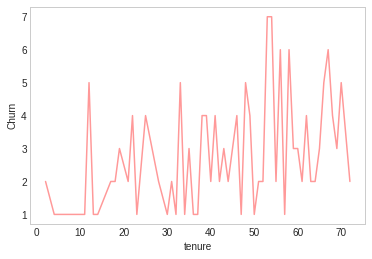

In [0]:
# One year contract churn plots:

sns.lineplot(x = oneyear_churn_counts.index, y = oneyear_churn_counts, 
             color = 'red',
             alpha = 0.4)

plt.grid()

##### Two Year Contract Customers

In [0]:
# 3) Churned numbers for one year contract customers

twoyear_churn = telco_km_twoyear[telco_km_twoyear['Churn'] == 'Yes']

twoyear_churn.head()

,Contract,tenure,Churn
104,Two year,68,Yes
268,Two year,59,Yes
336,Two year,43,Yes
811,Two year,70,Yes
975,Two year,71,Yes


In [0]:
# 2 yr contract churn counts

twoyear_churn_counts =  twoyear_churn.groupby(['tenure'])['Churn'].count()

In [0]:
# Check:

twoyear_churn_counts.head()

tenure
25    1
33    1
39    1
43    1
46    1
Name: Churn, dtype: int64

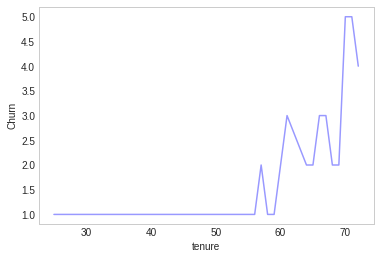

In [0]:
# Two year contract churn plots:

sns.lineplot(x = twoyear_churn_counts.index, y = twoyear_churn_counts, 
             color = 'blue',
             alpha = 0.4)

plt.grid()

##### All Three Customer Churn Plots In One

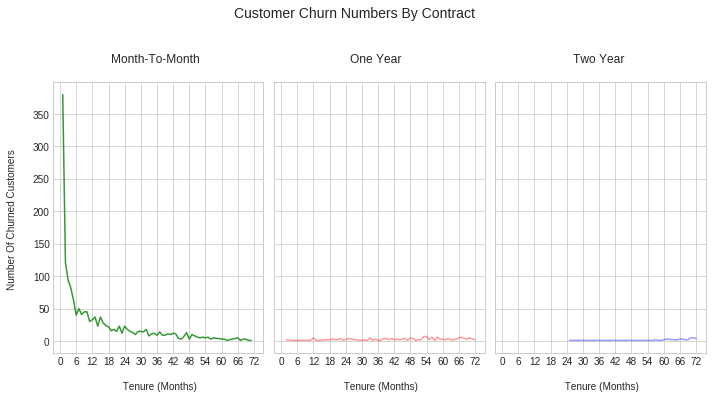

In [0]:
## A Better Plot Than The Above For Comparison

# Set style:

plt.style.use('seaborn-whitegrid')

# Subplots

fig, axes = plt.subplots(figsize = (10, 5), 
                                    nrows = 1, 
                                    ncols = 3,
                                    sharex = True,
                                    sharey = True)

# fig = overall figure

# Left (ax1) plot - Month-To-Month Customer Churn

sns.lineplot(x = monthly_churn_counts.index, y = monthly_churn_counts, 
             color = 'green',
             alpha = 0.8,
             ax = axes[0])


# Center (ax2) Plot - One year contract churn numbers

sns.lineplot(x = oneyear_churn_counts.index, y = oneyear_churn_counts, 
             color = 'red',
             alpha = 0.4,
             ax = axes[1])

# Right (ax3) Plot - Two year contract churn plots:

sns.lineplot(x = twoyear_churn_counts.index, y = twoyear_churn_counts, 
             color = 'blue',
             alpha = 0.4,
             ax = axes[2])

# Vertical light blue lines to separate years:

#for i in range(3):
#  axes[i].axvline(x = '2018-01-01', linewidth=2, color='blue', alpha = 0.10)
#  axes[i].axvline(x = '2017-01-01', linewidth=2, color='blue', alpha = 0.10)
#  axes[i].axvline(x = '2016-01-01', linewidth=2, color='blue', alpha = 0.10)

# Set titles:

axes[0].set_title('Month-To-Month  \n')

axes[1].set_title('One Year  \n')

axes[2].set_title('Two Year \n')

# y-axis Label:

axes[0].set_ylabel("Number Of Churned Customers \n")

# x-axis labels for labelling and rotation:
# https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec

for j in range(3):
  axes[j].set_xlabel('\n Tenure (Months)')

# Main title:
plt.suptitle('Customer Churn Numbers By Contract \n', 
             size = 14, 
             y = 1.10)

plt.tight_layout()

# x-ticks:

plt.xticks(np.arange(0, 74, step = 6))

# Save figure:

plt.autoscale()
plt.savefig('churnCounts_contract.png', dpi=300, bbox_inches = "tight")

plt.show()

### A Look At Contract Type & Monthly Charges

This section will look at the types of customers by contract and their monthly charges. What the customer pays is revenue coming into the business. 

High-paying customers with high tenures (customer loyalty) contribute to a large portion of the business sales & profits. Losing these type of customers hurts the company's bottom line as a revenue stream is eliminated along with possible damaged brand reputation.

In [0]:
# Total Number Of Customers

telco_data['Contract'].count()

7043

In [0]:
# Number Of Customers By Type

telco_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

The contract category with the largest counts is with `Month-to-month` at 3875. From the survival curve in the previous section it is shown that the most probable churn group comes from `Month-to-month` customers. 



**Month-To-Month Customers & Monthly Payments**

I want to look at monthly charges for the month-to-month customers only.

In [0]:
# Monthly charges on month to month customers preview

mth_charges_mthmth = telco_data[telco_data['Contract'] == 'Month-to-month']['MonthlyCharges']

In [0]:
# Use .describe():

mth_charges_mthmth.describe()

count    3875.000000
mean       66.398490
std        26.926599
min        18.750000
25%        45.850000
50%        73.250000
75%        88.875000
max       117.450000
Name: MonthlyCharges, dtype: float64

The mean of 66.40 is less than the median of 73.25. This implies a left (negative) skew distribution of monthly charges for Month to month customers. A lot of the frequencies are on the right side of the mean.

Text(0.5, 1.0, 'Distribution Of Monthly Charges For Month-To-Month Customers \n')

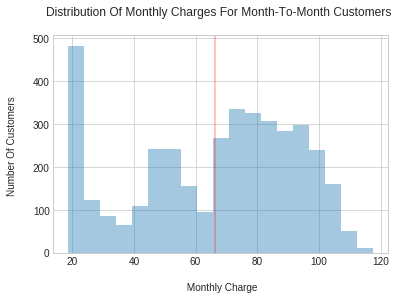

In [0]:
# Monthly charges on month-to-month customers:

sns.distplot(mth_charges_mthmth, kde = False)

# Mean line
plt.axvline(np.mean(mth_charges_mthmth), color = 'red', alpha = 0.3)

plt.xlabel('\n Monthly Charge')
plt.ylabel('Number Of Customers \n')
plt.title('Distribution Of Monthly Charges For Month-To-Month Customers \n')

**Expected Losses On Monthly Customers If They Churn**

Average monthly payment for a month-to-month customer is \$66.40. 

In [0]:
# Cumulative number of churns for monthly contracts in first 6 months:

print(monthly_churn_counts.head(20))
print(f'Cumulative Number Of Churns Within First 6 Months Of Tenure: {monthly_churn_counts.head(6).sum()}')

tenure
1     380
2     121
3      94
4      82
5      63
6      40
7      50
8      41
9      45
10     45
11     30
12     33
13     37
14     23
15     37
16     28
17     24
18     22
19     16
20     18
Name: Churn, dtype: int64
Cumulative Number Of Churns Within First 6 Months Of Tenure: 780


In [0]:
# Average Losses From These Customer Churns

avg_losses_insix_yrs = monthly_churn_counts.head(6).sum() * 66.40

In [0]:
# Print losses

avg_losses_insix_yrs.round(0)

51792.0

**A Look At Monthly Charges For One Year & Two Year Contracts For Comparison**



In [0]:
# Filter for one year & two year contracts monthly charges.

mth_charges_oneyear = telco_data[telco_data['Contract'] == 'One year']['MonthlyCharges']

mth_charges_twoyear = telco_data[telco_data['Contract'] == 'Two year']['MonthlyCharges']

In [0]:
# .describe()

display(mth_charges_oneyear.describe())

count    1473.000000
mean       65.048608
std        31.840539
min        18.250000
25%        26.900000
50%        68.750000
75%        94.800000
max       118.600000
Name: MonthlyCharges, dtype: float64

In [0]:
display(mth_charges_twoyear.describe())

count    1695.000000
mean       60.770413
std        34.678865
min        18.400000
25%        24.025000
50%        64.350000
75%        90.450000
max       118.750000
Name: MonthlyCharges, dtype: float64

**Comparing Mean & Median Monthly Charges By Contract Type**

Prices in USD currency.



| Contract Type  | Counts | Mean (Avg)  | Median  |
|---| ---| ---|---|
| Month-To-Month  | 3875 | \$66.40  | \$73.25  |
| One Year  | 1695 | \$65.05  | \$68.75  |
| Two Year  | 1473 | \$60.77 | \$64.35  |

When looking at this, an option can be do hypothesis testing to test if differences are (statistically) significant. This would be too much and unnecessary here.

It makes sense that on average (mean & median wise) that customers pay more on month-to-month than with one year and two plans. This possibly suggests that pricing is well structured.

In [0]:
# Churned values for month-to-month customers & Fiber Optic:

telco_monthly_fiber_churn = telco_data[(telco_data['Churn'] == 'Yes') &
                                       (telco_data['InternetService'] == 'Fiber optic')]

telco_monthly_fiber_churn.shape

(1297, 21)

## Decision Tree Model

At first I was thinking of trying out a logistic regression model, a KNN model and a decision tree model. 

A decision tree should be highly considered as the audience is marketing and operations mix. The rationale is to keep things simple and as non-technical as possible when it comes to explaining a model, concepts and recommendations.

### Decision Tree Model One 

* max_depth = 4
* max_leaf_nodes = 10

In [0]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Add a new column called is_monthly as a binary variable for the customer
# being on a monthly plan or not

telco_data['is_monthly'] = telco_data['Contract'].apply(lambda x: True if x == 'Month-to-month' else False)

In [0]:
# Convert Yes to True and No to False in Churn column:

telco_data['Churn'] = telco_data['Churn'].apply(lambda x: True if x == 'Yes' else False)

In [0]:
# Check data:

telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_monthly
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,True


In [0]:
# Set variables
# tenure (number of months), is_monthly (month-to-month plan or not) & Monthly Charges

X_dt1 = telco_data[['tenure',
                  'is_monthly',
                  'MonthlyCharges']]

y_dt1 = telco_data['Churn']

In [0]:
# Train, test split:

X_dt1_train, X_dt1_val, y_dt1_train, y_dt1_val = train_test_split(X_dt1,
                                                                  y_dt1,
                                                                  test_size = 0.2,
                                                                  random_state = 42)

In [0]:
# At first I did only max_features = None and random_state = 42, the tree was 
# too large:

# Fit model:

dtree1 = DecisionTreeClassifier(max_features = None,
                                max_depth = 4,
                                max_leaf_nodes = 10,
                                random_state = 42)

# Model fit:

dtree1.fit(X_dt1_train, y_dt1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
# Obtain parameters:

dtree1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [0]:
# Creating decision tree image:

from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create function version

def tree_model_image(model, column_names):
  '''
  This function takes inputs of a decision tree classifier & column names of 
  the independent variables & outputs the tree image of the model.
  '''
  
  assert isinstance(model, DecisionTreeClassifier), "Please input a DecisionTreeClassifier model."

  dot_data = StringIO()

  export_graphviz(model,
                  feature_names = column_names,
                  out_file = dot_data,
                  filled = True,
                  rounded = True,
                  special_characters = True)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  # Create PNG
  graph.write_png("dtree.png")
  display(Image(graph.create_png()))

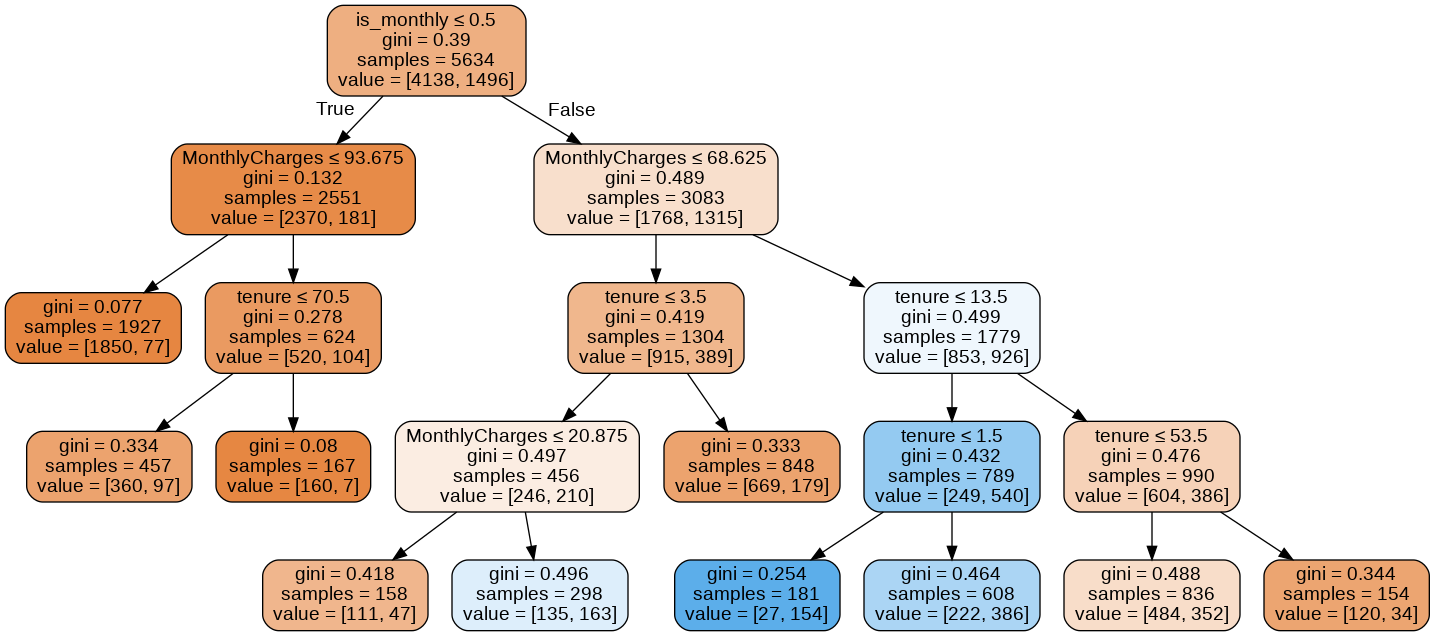

In [0]:
tree_model_image(dtree1, X_dt1.columns)

In [0]:
# Accuracy & recall on train and val data sets:

print(f'Training Accuracy: {dtree1.score(X_dt1_train, y_dt1_train):.3f}')
print(f'Validation Accuracy: {dtree1.score(X_dt1_val, y_dt1_val):.3f}')

Training Accuracy: 0.791
Validation Accuracy: 0.789


The accuracy score is near 80% which is way above than a fair coin flip of 50%.

In [0]:
print(f'Train Recall: {recall_score(y_dt1_train, dtree1.predict(X_dt1_train)):.3f}')
print(f'Validation Recall: {recall_score(y_dt1_val, dtree1.predict(X_dt1_val)):.3f}')

Train Recall: 0.470
Validation Recall: 0.477


Recall percentage

In [0]:
# Tree classes:

# Check classes:

dtree1.classes_

array([False,  True])

In [0]:
# Feature importance:
# Columns in X_dt1 were tenure, is_monthly & monthly charges

dtree1.feature_importances_

array([0.23978724, 0.58940675, 0.17080601])

The customer being on a monthly plan or not (is_monthly) is the number one factor if it leads to customer churn.

Tenure and monthly charges are not that big factors relative to is_monthly for affecting customer churn.

In [0]:
# Predict probabilities:

dtree1.predict_proba(X_dt1_train)

array([[0.96004152, 0.03995848],
       [0.78774617, 0.21225383],
       [0.45302013, 0.54697987],
       ...,
       [0.78891509, 0.21108491],
       [0.36513158, 0.63486842],
       [0.96004152, 0.03995848]])

### Model Two - Model One With Balanced Weights

In [0]:
# At first I did only max_features = None and random_state = 42, the tree was 
# too large:

# Fit model:

dtree2 = DecisionTreeClassifier(max_features = None,
                                max_depth = 4,
                                max_leaf_nodes = 10,
                                class_weight = 'balanced',
                                random_state = 42)

# Model fit:

dtree2.fit(X_dt1_train, y_dt1_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

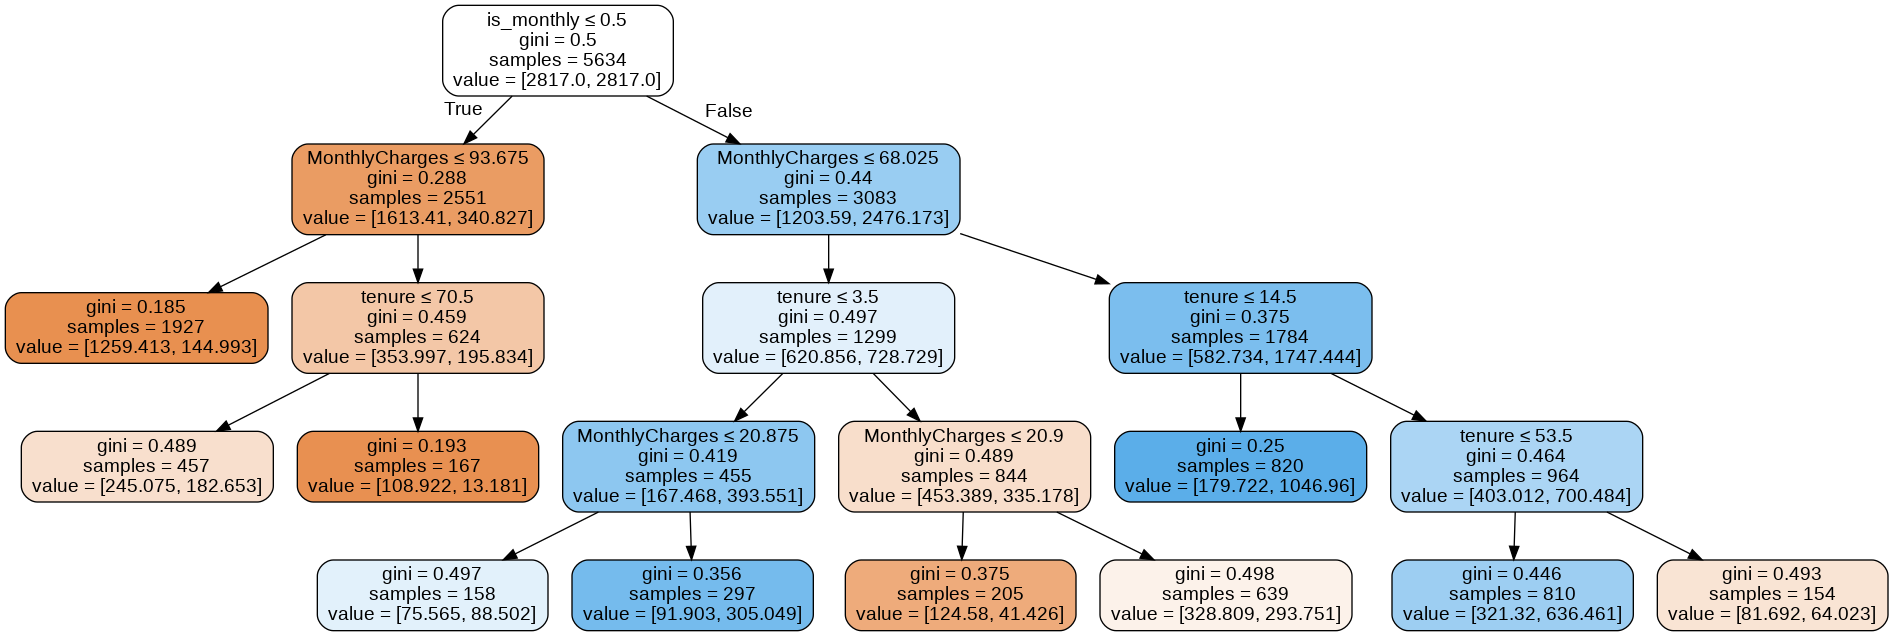

In [0]:
# Generate decision tree model:

tree_model_image(dtree2, X_dt1.columns)

In [0]:
# Feature importance:
# Columns in X_dt1 were tenure, is_monthly & monthly charges

dtree2.feature_importances_

array([0.14929416, 0.68712048, 0.16358535])

With balanced class weights, the `is_monthly` feature contributes to even more of the customer churn outcome.

Let's look at accuracy & recall scores:

In [0]:
# Accuracy & recall on train and val data sets:

print(f'Training Accuracy: {dtree2.score(X_dt1_train, y_dt1_train):.3f}')
print(f'Validation Accuracy: {dtree2.score(X_dt1_val, y_dt1_val):.3f}')

Training Accuracy: 0.756
Validation Accuracy: 0.759


Accuracy scores went from near 80% to just over 75% versus model one (unbalanced weights).

In [0]:
# Recall scores

print(f'Train Recall: {recall_score(y_dt1_train, dtree2.predict(X_dt1_train)):.3f}')
print(f'Validation Recall: {recall_score(y_dt1_val, dtree2.predict(X_dt1_val)):.3f}')

Train Recall: 0.737
Validation Recall: 0.772


Recall scores for both train and validation set went up from below 50% to mid 70%.

In [0]:
dtree2.classes_

array([False,  True])

In [0]:
# Predict probabilities:

dtree2.predict_proba(X_dt1_train)

array([[0.89675869, 0.10324131],
       [0.57296909, 0.42703091],
       [0.2315216 , 0.7684784 ],
       ...,
       [0.52815592, 0.47184408],
       [0.14651041, 0.85348959],
       [0.89675869, 0.10324131]])

### Model Three - Grid Search

Models one and two were for testing. The second model with balanced weights had a better recall score than the first one.

However, I would like a even simpler model than the second one but still retain an accuracy & recall score (for train & validation) to be at least 70%. A simpler model would be easier to interpret for a marketing/operations team.

In [0]:
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [0]:
# Set parameters for grid search:

grid_params = {'class_weight': ['balanced'],
               'max_features': [3],
               'max_leaf_nodes': np.arange(2, 8, 1),
               'random_state': [42],
               'max_depth': [2, 3, 4],
               'splitter': ['best']
}

In [0]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# Grid search decision tree:

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(), 
                            grid_params,
                            cv = 5,
                            scoring = 'recall',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Fit to training data:

grid_search_dtree.fit(X_dt1_train, y_dt1_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [2, 3, 4],
                         'max_features': [3],
             

In [0]:
# Check results:

pd.DataFrame(grid_search_dtree.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.0083097,0.00774684,0.00800228,0.00898042,0.00822268,0.00754085,0.00765414,0.00949531,0.00982785,0.00890951,0.00915003,0.00869098,0.00838513,0.00803132,0.00845151,0.00982032,0.00931358,0.00936437
std_fit_time,0.000732732,0.000189378,0.0010372,0.00112287,0.000957757,0.00040985,0.000225496,0.00235168,0.00248374,0.000674652,0.0014306,9.61811e-05,0.000975518,0.000177497,0.000267128,0.00191684,0.000110724,0.000709884
mean_score_time,0.00353451,0.00341325,0.00343313,0.00501723,0.00354295,0.00485134,0.00355692,0.00353603,0.00351419,0.00371346,0.00360355,0.00355029,0.00353994,0.00332298,0.0035677,0.00363955,0.00377574,0.00336356
std_score_time,0.000193648,0.000101924,0.000355579,0.00186613,4.10486e-05,0.00266943,0.000209231,0.000121695,8.3099e-05,0.000408507,8.70829e-05,0.000130314,0.000352495,5.20246e-05,0.000150794,0.000210467,0.00031006,0.000613268
param_class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_max_depth,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4
param_max_features,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
param_max_leaf_nodes,2,3,4,5,6,7,2,3,4,5,6,7,2,3,4,5,6,7
param_random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
param_splitter,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best


There are multiple models that are ranked one. `.best_params_` will choose the one that is ranked one first.

In [0]:
# Best parameters:

grid_search_dtree.best_params_

{'class_weight': 'balanced',
 'max_depth': 2,
 'max_features': 3,
 'max_leaf_nodes': 2,
 'random_state': 42,
 'splitter': 'best'}

In [0]:
# Best estimator:

grid_search_dtree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=3, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
# Feature importances:

grid_search_dtree.best_estimator_.feature_importances_

array([0., 1., 0.])

In [0]:
# Train & Validation Accuracy Scores

print(f'Train Accuracy: {grid_search_dtree.best_estimator_.score(X_dt1_train, y_dt1_train):.3f}')

print(f'Validation Accuracy: {grid_search_dtree.best_estimator_.score(X_dt1_val, y_dt1_val):.3f}')

Train Accuracy: 0.654
Validation Accuracy: 0.656


In [0]:
# Train & Validation Recall Scores

print(f'Train Recall: {recall_score(y_dt1_train, grid_search_dtree.best_estimator_.predict(X_dt1_train)):.3f}')

print(f'Validation Recall: {recall_score(y_dt1_val, grid_search_dtree.best_estimator_.predict(X_dt1_val)):.3f}')


Train Recall: 0.879
Validation Recall: 0.912


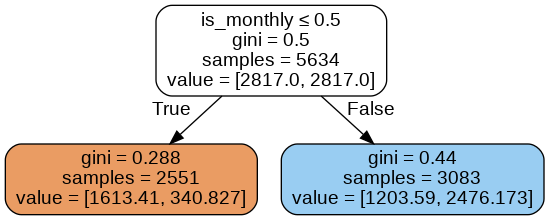

In [0]:
# Generate decision tree model:

tree_model_image(grid_search_dtree.best_estimator_, X_dt1.columns)

The recall scores is very high but the decision tree image only shows that only the `is_monthly` feature is used. 

I would like to use at least one more of either `tenure` or `MonthlyCharges` for a more realistic model and for target recommendations for saving potential churned customers.

### Model Four 

In [0]:
# At first I did only max_features = None and random_state = 42, the tree was 
# too large:

# Fit model:

dtree4 = DecisionTreeClassifier(max_features = None,
                                max_depth = 4,
                                max_leaf_nodes = 6,
                                class_weight = 'balanced',
                                random_state = 42)

# Model fit:

dtree4.fit(X_dt1_train, y_dt1_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

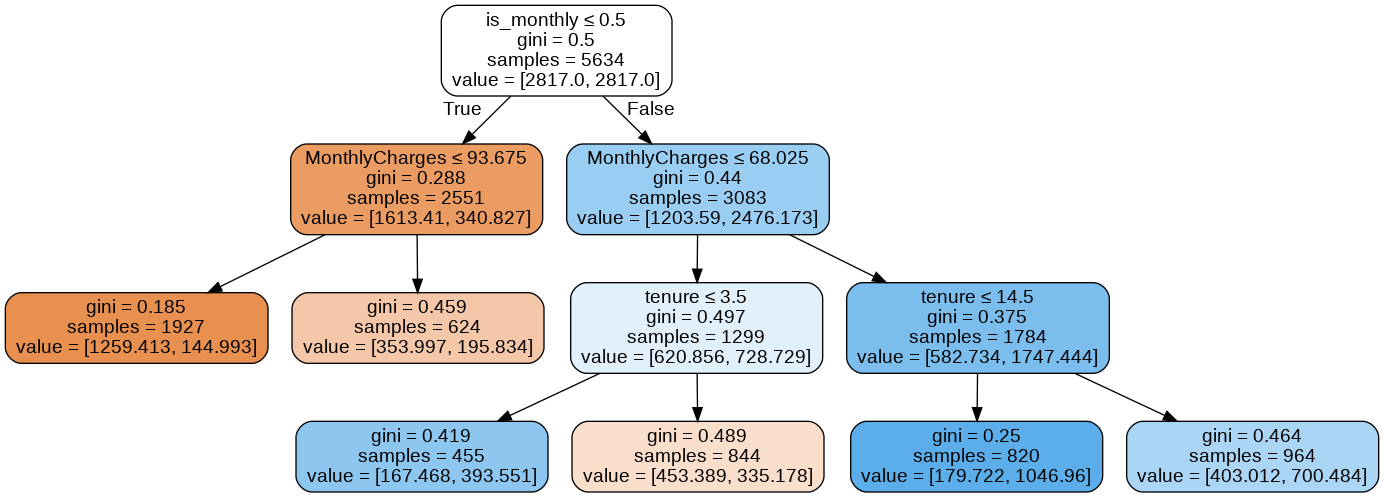

In [0]:
# Generate decision tree model:

tree_model_image(dtree4, X_dt1.columns)

In [0]:
# Feature importance:
# Columns in X_dt1 were tenure, is_monthly & monthly charges

dtree4.feature_importances_

array([0.12203069, 0.73258386, 0.14538545])

In [0]:
# Accuracy & recall on train and val data sets:

print(f'Training Accuracy: {dtree4.score(X_dt1_train, y_dt1_train):.3f}')
print(f'Validation Accuracy: {dtree4.score(X_dt1_val, y_dt1_val):.3f}')

Training Accuracy: 0.741
Validation Accuracy: 0.748


In [0]:
# Recall scores

print(f'Train Recall: {recall_score(y_dt1_train, dtree4.predict(X_dt1_train)):.3f}')
print(f'Validation Recall: {recall_score(y_dt1_val, dtree4.predict(X_dt1_val)):.3f}')

Train Recall: 0.760
Validation Recall: 0.804


### Model Five (Chosen Model) - Grid Search Two By f1_score

In [0]:
# Set parameters for grid search:

grid_params2 = {'class_weight': ['balanced'],
               'max_features': [3],
               'max_leaf_nodes': np.arange(2, 8, 1),
               'random_state': [42],
               'max_depth': [2, 3, 4],
               'splitter': ['best']
}

In [0]:
# Grid search decision tree:


grid_search_dtree2 = GridSearchCV(DecisionTreeClassifier(), 
                            grid_params2,
                            cv = 5,
                            scoring = 'f1',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Fit to training data:

grid_search_dtree2.fit(X_dt1_train, y_dt1_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [2, 3, 4],
                         'max_features': [3],
             

In [0]:
# Check results:

pd.DataFrame(grid_search_dtree2.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.00857658,0.00766501,0.00967131,0.00773921,0.00783529,0.00763726,0.00765643,0.00809388,0.00846925,0.00817103,0.00881543,0.00854082,0.00730147,0.00796371,0.00865073,0.00890679,0.00940433,0.0102332
std_fit_time,0.000660527,4.14924e-05,0.00270868,0.000165748,0.000444988,0.000290698,0.000342958,7.0015e-05,0.00027195,0.000166394,0.000540154,0.000314386,0.000153908,0.000114739,0.00040488,3.20708e-05,0.000455979,0.00148823
mean_score_time,0.00368271,0.00358782,0.00358829,0.00351505,0.00348239,0.00352888,0.00346355,0.0035409,0.00358801,0.00342021,0.00337653,0.00347891,0.00341315,0.00352383,0.00352817,0.00361352,0.00363569,0.00347495
std_score_time,0.000166028,0.00012351,0.000161567,6.88551e-05,4.16992e-05,4.49178e-05,0.00015155,3.97456e-05,0.000224946,6.70669e-05,4.3623e-05,0.000109504,7.42156e-05,0.000237068,0.000247625,0.000185472,6.4531e-05,0.000276983
param_class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_max_depth,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4
param_max_features,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
param_max_leaf_nodes,2,3,4,5,6,7,2,3,4,5,6,7,2,3,4,5,6,7
param_random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
param_splitter,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best,best


In [0]:
# Best parameters:

grid_search_dtree2.best_params_

{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 3,
 'max_leaf_nodes': 6,
 'random_state': 42,
 'splitter': 'best'}

In [0]:
# Best estimator:

grid_search_dtree2.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
# Classes:

grid_search_dtree2.best_estimator_.classes_

array([False,  True])

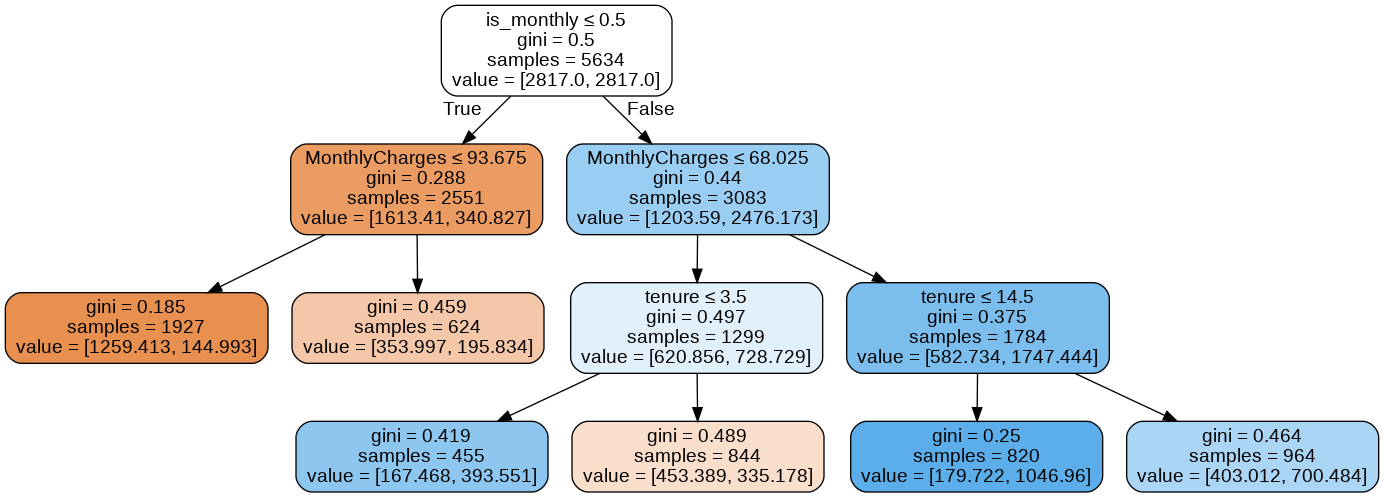

In [0]:
# Decision tree image:

tree_model_image(grid_search_dtree2.best_estimator_, X_dt1.columns)



Note that `is_monthly = 1` means that the customer is on a month-to-month plan.

In [0]:
# Feature importances:
# columns were tenure, is_monthly & monthly charges

grid_search_dtree2.best_estimator_.feature_importances_

array([0.12203069, 0.73258386, 0.14538545])

**Feature Importances**

1. `is_monthly`
2. `tenure`
3. `MonthlyCharges`

In [0]:
# Train & Validation Accuracy Scores 

print(f'Train Accuracy: {grid_search_dtree2.best_estimator_.score(X_dt1_train, y_dt1_train):.3f}')

print(f'Validation Accuracy: {grid_search_dtree2.best_estimator_.score(X_dt1_val, y_dt1_val):.3f}')

Train Accuracy: 0.741
Validation Accuracy: 0.748


In [0]:
# Train & Validation Recall Scores

print(f'Train Recall: {recall_score(y_dt1_train, grid_search_dtree2.best_estimator_.predict(X_dt1_train)):.3f}')

print(f'Validation Recall: {recall_score(y_dt1_val, grid_search_dtree2.best_estimator_.predict(X_dt1_val)):.3f}')


Train Recall: 0.760
Validation Recall: 0.804


In [0]:
# Train & Validation F1 Scores

print(f'Train F1: {f1_score(y_dt1_train, grid_search_dtree2.best_estimator_.predict(X_dt1_train)):.3f}')

print(f'Validation F1: {f1_score(y_dt1_val, grid_search_dtree2.best_estimator_.predict(X_dt1_val)):.3f}')


Train F1: 0.609
Validation F1: 0.628


## K-Nearest Neighbours Model Selection

Using K-Nearest Neighbors (KNN) for model selection.

In [0]:
# Copy of data:

knn_data = telco_data.copy()

In [0]:
# Check data:

knn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_monthly
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,True


In [0]:
# Set variables:

X_knn = knn_data[['tenure', 'is_monthly', 'MonthlyCharges']]
y_knn = knn_data['Churn']

In [0]:
knn_numerical_vars = ['tenure', 'MonthlyCharges']

In [0]:
# Build column transformer:


knn_transformer = ColumnTransformer(
                  transformers = [('scaler', MinMaxScaler(), knn_numerical_vars)],
                  remainder = 'passthrough',
                  verbose = True
                  )

In [0]:
# Make pipeline with column transformer & KNN:

knn_pipe = Pipeline(steps = [('transform', knn_transformer),
                             ('knn', KNeighborsClassifier())],
                             verbose = True)

In [0]:
knn_pipe.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'steps': [('transform',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('scaler',
                                    MinMaxScaler(copy=True, feature_range=(0, 1)),
                                    ['tenure', 'MonthlyCharges'])],
                     verbose=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='unifor

### KNN Model One - GridSearch1 (recall)

In [0]:
# KNN 

knn_params1 = {'knn__weights': ['uniform', 'distance'],
               'knn__p': [1, 2],
               'knn__n_neighbors': np.arange(1, 25, 2)}


In [0]:
# Set grid search:

grid_search_knn1 = GridSearchCV(knn_pipe, 
                            knn_params1,
                            cv = 5,
                            scoring = 'recall',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Fit grid search
# Use X_knn2 as it was untransformed.

grid_search_knn1.fit(X_knn, y_knn)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s


[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transform',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         ['tenure',
                                                          

In [0]:
# Best score

grid_search_knn1.best_score_

0.5034738954478899

In [0]:
# Best weighting option

grid_search_knn1.best_params_

{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}

In [0]:
# Best estimator:

grid_search_knn1.best_estimator_

Pipeline(memory=None,
         steps=[('transform',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                

In [0]:
# Obtain accuracy score:

grid_search_knn1.best_estimator_.named_steps['knn'].score(X_knn, y_knn)

0.7317904302143973

In [0]:
# Obtain recall score:

recall_score(y_knn, grid_search_knn1.predict(X_knn))

0.9604066345639379

In [0]:
# f1_score

f1_score(y_knn, grid_search_knn1.predict(X_knn))

0.9537725823591924

This recall score is suspiciously high. Then again, the best model from this first KNN grid search uses only 1 neighbor which is a low sample size.

### KNN Model Two - GridSearch2 (f1_score)

Have minimum of 5 neighbors.

In [0]:
# KNN 

knn_params2 = {'knn__weights': ['uniform', 'distance'],
               'knn__p': [1, 2],
               'knn__n_neighbors': np.arange(5, 25, 2)}

In [0]:
# Set grid search:

grid_search_knn2 = GridSearchCV(knn_pipe, 
                            knn_params2,
                            cv = 5,
                            scoring = 'f1',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Fit grid search
# Use X_knn2 as it was untransformed.

grid_search_knn2.fit(X_knn, y_knn)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s


[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transform',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         ['tenure',
                                                          

In [0]:
# Best score

grid_search_knn2.best_score_

0.5567182149717005

In [0]:
# Best weighting option

grid_search_knn2.best_params_

{'knn__n_neighbors': 21, 'knn__p': 2, 'knn__weights': 'uniform'}

The number of `n_neighbors` here is not a low number like 1, 3 or 5.

In [0]:
# Best estimator:

grid_search_knn2.best_estimator_

Pipeline(memory=None,
         steps=[('transform',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['tenure',
                                                   'MonthlyCharges'])],
                                   verbose=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=21, p=2,
                               

In [0]:
# Obtain accuracy score:

grid_search_knn2.best_estimator_.named_steps['knn'].score(X_knn, y_knn)

0.7346301292063041

In [0]:
# Obtain recall score:

recall_score(y_knn, grid_search_knn2.predict(X_knn))

0.521669341894061

In [0]:
# f1_score

f1_score(y_knn, grid_search_knn2.predict(X_knn))

0.5905511811023622

The recall and f1_score metrics for KNN models from Grid Search is not as high as the metric scores from decision tree recall & f1_score.

A KNN model is not great as the recall and f1_score metrics are not high. Also the KNN model is biased towards points near the test data for predictions. This model does not generalize well to new data.

## Logistic Regression Models

Using logistic regression for classifcation of customers churning or not.

Trying out:

1. Logistic No Regularization Various Models
3. LASSO
4. Ridge
5. Elastic Net
6. Grid Search Super Combination

&nbsp;

All cases will use grid search with `refit = Recall` when using multiple scorers.

In [0]:
# Create copy for logistic regression:

logit_data = telco_data.copy()

In [0]:
# Preview data:

logit_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_monthly
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,True


In [0]:
# Look at columns:

logit_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'is_monthly'],
      dtype='object')

In [0]:
logit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null bool
is_monthly          7043 non-null b

The column `TotalCharges` should be a float64 column but it is an object column. Investigating this.

In [0]:
# Having errors = coerce fixes things

logit_data['TotalCharges'] = pd.to_numeric(logit_data['TotalCharges'], errors = 'coerce')

In [0]:
# Number of null values in Total Charges:

logit_data['TotalCharges'].isnull().sum()

11

Need to fill in Null values with tenure number of months times monthly charger
to obtain total charges. This assumes no overage/extra fees in total charges.

In [0]:
# Find null values by index:

logit_data[logit_data['TotalCharges'].isnull()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [0]:
# Find null values by index:
# Ref: https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra

null_indices = logit_data[logit_data['TotalCharges'].isnull()].index.tolist()

In [0]:
logit_data[logit_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_monthly
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,False,False
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,False,False
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,False,False
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,False,False
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,False,False
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,False,False
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,False,False
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,False,False
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,False,False
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,False,False


In [0]:
logit_data.loc[null_indices, 'tenure'] 

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

It appears that the NULL values in TotalCharges are associated with tenure months of 0. These null values can be easily replaced by zero. However, it is better to do tenure multiplied by monthly charges. (This assumes no overage fees but it does not apply to new customers.)

In [0]:
logit_data.loc[null_indices, 'TotalCharges'] = logit_data.loc[null_indices, 'tenure'] * logit_data.loc[null_indices, 'MonthlyCharges']

In [0]:
# Check values are zero now:

logit_data.loc[null_indices, 'TotalCharges']

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

In [0]:
# Set variables:
# target variable is Churn
# Did not include CustomerID or gender:

numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

catg_variables = ['SeniorCitizen', 'Partner', 'Dependents',
                  'PhoneService', 'MultipleLines', 'InternetService',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaperlessBilling', 'PaymentMethod',
                  'is_monthly']


**Create Logistic Pipeline**



In [0]:
# Create pipeline of Scaler & Logistic Regression:

pipe_logistic = Pipeline([('scaler', StandardScaler()),
                          ('clf', LogisticRegression(class_weight = 'balanced'))])

In [0]:
# Set variables:
# Include tenure, monthlycharges, TotalCharges, is_monthly

Xlogit_1 = logit_data[numerical_variables + ['is_monthly']]

ylogit_1 = logit_data['Churn']

In [0]:
Xlogit_1.head()

,tenure,MonthlyCharges,TotalCharges,is_monthly
0,1,29.85,29.85,True
1,34,56.95,1889.50,False
2,2,53.85,108.15,True
3,45,42.30,1840.75,False
4,2,70.70,151.65,True


In [0]:
Xlogit_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null float64
is_monthly        7043 non-null bool
dtypes: bool(1), float64(2), int64(1)
memory usage: 172.0 KB


In [0]:
ylogit_1.head()

0    False
1    False
2     True
3    False
4     True
Name: Churn, dtype: bool

### Logistic No Regularization 

In [0]:
params_1 = {
    'clf__penalty': ['none'],
    'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}

In [0]:
# Scoring methods
# Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

scoring = {'Accuracy': make_scorer(accuracy_score),
           'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}


In [0]:
# Defining grid search

grid_logit1 = GridSearchCV(pipe_logistic, 
                            params_1, 
                            scoring = scoring,
                            cv = 5,
                            refit = 'Recall',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# grid search fit, 5 folds for each solver

grid_logit1.fit(Xlogit_1, ylogit_1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_logit1.cv_results_).transpose()

,0,1,2,3
mean_fit_time,0.033295,0.0426473,0.045688,0.0327434
std_fit_time,0.00271225,0.00228652,0.00381878,0.00306968
mean_score_time,0.0130836,0.0114439,0.011186,0.0104037
std_score_time,0.00208471,0.000595901,0.000559848,0.00164171
param_clf__penalty,none,none,none,none
param_clf__solver,lbfgs,newton-cg,sag,saga
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'sag'}","{'clf__penalty': 'none', 'clf__solver': 'saga'}"
split0_test_Accuracy,0.71753,0.71753,0.71753,0.71753
split1_test_Accuracy,0.738112,0.738112,0.738112,0.738112
split2_test_Accuracy,0.716111,0.716111,0.716111,0.716111


In [0]:
# Best params:

grid_logit1.best_params_

{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}

In [0]:
# Best score

grid_logit1.best_score_.round(3)

0.825

In [0]:
# Best estimator:

grid_logit1.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Obtain coefficients:
# Columns were tenure, monthlycharges, TotalCharges, is_monthly

grid_logit1.best_estimator_.named_steps['clf'].coef_

array([[-1.15190478,  0.78842393,  0.31670577,  0.69109771]])

The lowest coefficient in absolute value is TotalCharges at 0.316. Keep MonthlyCharges and drop TotalCharges even though TotalCharges captures overage fees.

In [0]:
# Recall score of logistic regression:

recall_score(ylogit_1, grid_logit1.predict(Xlogit_1))

0.8250401284109149

In [0]:
# F1 Score:

f1_score(ylogit_1, grid_logit1.predict(Xlogit_1))

0.6149551345962114

In [0]:
# Log Loss 

log_loss(ylogit_1, grid_logit1.predict(Xlogit_1))

9.469779891076325

### Logistic Model - Tenure & MonthlyCharges & No Regularization

Using tenure and MonthlyCharges only (dropped TotalCharges & is_monthly)

In [0]:
# Set variables:

Xlogit_2 = logit_data[['tenure', 'MonthlyCharges']]

ylogit_2 = logit_data['Churn']

In [0]:
# Defining grid search
# Use same params_1 and scoring dictionary:

grid_logit2 = GridSearchCV(pipe_logistic, 
                            params_1, 
                            scoring = scoring,
                            cv = 5,
                            refit = 'Recall',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Use same grid search from before but input X_logit2

grid_logit2.fit(Xlogit_2, ylogit_2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_logit2.cv_results_).transpose()

,0,1,2,3
mean_fit_time,0.0198709,0.0317997,0.0427333,0.0263988
std_fit_time,0.000689078,0.000988741,0.0057345,0.0020023
mean_score_time,0.00959363,0.00989919,0.00901713,0.00957131
std_score_time,0.000429992,0.000523523,0.000185407,0.000732479
param_clf__penalty,none,none,none,none
param_clf__solver,lbfgs,newton-cg,sag,saga
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'sag'}","{'clf__penalty': 'none', 'clf__solver': 'saga'}"
split0_test_Accuracy,0.706884,0.706884,0.706884,0.706884
split1_test_Accuracy,0.733144,0.733144,0.733144,0.733144
split2_test_Accuracy,0.722498,0.722498,0.722498,0.722498


In [0]:
# Best params:

grid_logit2.best_params_

{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}

In [0]:
# Best score

grid_logit2.best_score_

0.7276582063041378

In [0]:
# Best estimator:

grid_logit2.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Obtain coefficients:
# Columns were tenure, monthlycharges

grid_logit2.best_estimator_.named_steps['clf'].coef_

array([[-1.33046822,  0.9989964 ]])

In [0]:
# Recall score of logistic regression:

recall_score(ylogit_2, grid_logit2.predict(Xlogit_2))

0.7255216693418941

In [0]:
# f1 score

f1_score(ylogit_2, grid_logit2.predict(Xlogit_2))

0.5823491518144729

In [0]:
# Log Loss 

log_loss(ylogit_2, grid_logit2.predict(Xlogit_2))

9.53841617373581

### Logistic Model - Tenure, MonthlyCharges & Is_monthly & No Regul.

In [0]:
# Set variables:

Xlogit_3 = logit_data[['tenure', 'MonthlyCharges', 'is_monthly']]

ylogit_3 = logit_data['Churn']

In [0]:
# Defining grid search
# Use same params_1 and scoring dictionary:

grid_logit3 = GridSearchCV(pipe_logistic, 
                            params_1, 
                            scoring = scoring,
                            cv = 5,
                            refit = 'Recall',
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Use same grid search from before but input X_logit2

grid_logit3.fit(Xlogit_3, ylogit_3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_logit3.cv_results_).transpose()

,0,1,2,3
mean_fit_time,0.0249257,0.0462907,0.0504879,0.0340458
std_fit_time,0.000767701,0.0026039,0.00133408,0.00232631
mean_score_time,0.0112413,0.0115825,0.0112254,0.0099278
std_score_time,0.000202783,0.000262682,0.000281407,0.00133541
param_clf__penalty,none,none,none,none
param_clf__solver,lbfgs,newton-cg,sag,saga
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'sag'}","{'clf__penalty': 'none', 'clf__solver': 'saga'}"
split0_test_Accuracy,0.731015,0.731015,0.731015,0.731015
split1_test_Accuracy,0.74379,0.74379,0.74379,0.74379
split2_test_Accuracy,0.727466,0.727466,0.727466,0.727466


In [0]:
# Best params:

grid_logit3.best_params_

{'clf__penalty': 'none', 'clf__solver': 'lbfgs'}

In [0]:
# Best score

grid_logit3.best_score_

0.7859763111472244

In [0]:
# Best estimator:

grid_logit3.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Obtain coefficients:
# Columns were tenure, monthlycharges, is_monthly

grid_logit3.best_estimator_.named_steps['clf'].coef_

array([[-0.88276031,  0.87865078,  0.68417187]])

In [0]:
# Recall scores:

recall_score(ylogit_3, grid_logit3.best_estimator_.predict(Xlogit_3))

0.7870518994114499

In [0]:
# f1 score

f1_score(ylogit_3, grid_logit3.predict(Xlogit_3))

0.6101202820406469

In [0]:
# Log loss

log_loss(ylogit_3, grid_logit3.predict(Xlogit_3))

9.219662732617298

This recall score is higher than the second model which had about 0.72. The first model with tenure, monthlycharges, TotalCharges & is_monthly had a recall score of about 0.825.

In terms of feature selection, I am going with:

* tenure
* MonthlyCharges
* is_monthly

This is consistent with the selected variables from the decision tree section.

### Logistic Model - LASSO Regularization

In [0]:
# Set variables:

Xlogit_reg = logit_data[['tenure', 'MonthlyCharges', 'is_monthly']]

ylogit_reg = logit_data['Churn']

In [0]:
# Values For C

[10 ** num for num in range(-4, 5, 1)]

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [0]:
# Parameters For Lasso

params_lasso = {
    'clf__penalty': ['l1'],
    'clf__C': [10 ** num for num in range(-4, 5, 1)],
    'clf__solver': ['liblinear', 'saga'],
    'clf__random_state': [42]
}

In [0]:
# Grid Search LASSO:

grid_search_lasso = GridSearchCV(pipe_logistic,
                            params_lasso,
                            scoring = scoring,
                            refit = 'Recall',
                            cv = 5,
                            n_jobs = -1,
                            )

In [0]:
# Fit model:

grid_search_lasso.fit(Xlogit_reg, ylogit_reg)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_search_lasso.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.012793,0.0146711,0.0148799,0.0326138,0.021267,0.0369828,0.0196694,0.0345629,0.0192337,0.0362747,0.0207718,0.0348593,0.0210902,0.0351979,0.0192754,0.0351227,0.021314,0.029654
std_fit_time,0.000840694,0.000453676,0.00174358,0.00172325,0.00192733,0.00360894,0.000661822,0.00106316,0.00100937,0.00287221,0.00263927,0.000596411,0.00273735,0.000990311,0.000613336,0.000619753,0.00272331,0.00622357
mean_score_time,0.0114469,0.0105832,0.0114378,0.0112138,0.0109498,0.0113844,0.010647,0.0107764,0.0108922,0.0114462,0.0114227,0.0106915,0.0111067,0.0108346,0.0123338,0.0114209,0.012055,0.00883131
std_score_time,0.00193751,0.000210335,0.000596697,0.000377363,0.000366084,0.000467333,0.000490002,0.000585363,0.000376396,0.00124995,0.0010683,0.000352017,0.000605176,0.000321344,0.00321252,0.00168242,0.002177,0.00169972
param_clf__C,0.0001,0.0001,0.001,0.001,0.01,0.01,0.1,0.1,1,1,10,10,100,100,1000,1000,10000,10000
param_clf__penalty,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1,l1
param_clf__random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
param_clf__solver,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga,liblinear,saga
params,"{'clf__C': 0.0001, 'clf__penalty': 'l1', 'clf_...","{'clf__C': 0.0001, 'clf__penalty': 'l1', 'clf_...","{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__r...","{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__r...","{'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__ra...","{'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__ra...","{'clf__C': 1, 'clf__penalty': 'l1', 'clf__rand...","{'clf__C': 1, 'clf__penalty': 'l1', 'clf__rand...","{'clf__C': 10, 'clf__penalty': 'l1', 'clf__ran...","{'clf__C': 10, 'clf__penalty': 'l1', 'clf__ran...","{'clf__C': 100, 'clf__penalty': 'l1', 'clf__ra...","{'clf__C': 100, 'clf__penalty': 'l1', 'clf__ra...","{'clf__C': 1000, 'clf__penalty': 'l1', 'clf__r...","{'clf__C': 1000, 'clf__penalty': 'l1', 'clf__r...","{'clf__C': 10000, 'clf__penalty': 'l1', 'clf__...","{'clf__C': 10000, 'clf__penalty': 'l1', 'clf__..."
split0_test_Accuracy,0.734564,0.734564,0.663591,0.663591,0.688432,0.708304,0.729595,0.730305,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015


In [0]:
# Best params:

grid_search_lasso.best_params_

{'clf__C': 0.001,
 'clf__penalty': 'l1',
 'clf__random_state': 42,
 'clf__solver': 'liblinear'}

In [0]:
# Best Score:

grid_search_lasso.best_score_

0.8854967075200398

In [0]:
# Best estimator:

grid_search_lasso.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Obtain coefficients:
# Columns were tenure, monthlycharges, is_monthly

grid_search_lasso.best_estimator_.named_steps['clf'].coef_

array([[0.        , 0.        , 0.36955876]])

In [0]:
# Recall scores:

recall_score(ylogit_reg, grid_search_lasso.best_estimator_.predict(Xlogit_reg))

0.8855002675227395

In [0]:
# f1_score

f1_score(ylogit_reg, grid_search_lasso.best_estimator_.predict(Xlogit_reg))

0.5762534818941504

In [0]:
# Log_loss:

log_loss(ylogit_reg, grid_search_lasso.best_estimator_.predict(Xlogit_reg))

11.936554998084288

This particular model only has one non-zero coefficient for the `is_monthly` variable. The recall score is very high at 88.55% but it has a higher log loss compared to the previous three models.

### Logistic Model - Ridge Regularization

In [0]:
np.logspace(-2, 1, 4)

array([ 0.01,  0.1 ,  1.  , 10.  ])

In [0]:
# Parameters For Ridge, use l2 penalty.

params_ridge = {
    'clf__penalty': ['l2'],
    'clf__C': np.logspace(-2, 1, 4),
    'clf__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'clf__random_state': [42]
}

In [0]:
# Grid Search For Ridge

grid_search_ridge = GridSearchCV(pipe_logistic,
                            params_ridge,
                            scoring = scoring,
                            refit = 'Recall',
                            cv = 5,
                            n_jobs = -1,
                            verbose = True
                            )

In [0]:
# Fit Ridge Logistic Model:

grid_search_ridge.fit(Xlogit_reg, ylogit_reg)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_search_ridge.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,0.0176444,0.0233322,0.0421484,0.0281025,0.0306999,0.0173729,0.0255001,0.0437304,0.0293577,0.0298606,0.0173745,0.025313,0.0443412,0.0421927,0.0352301,0.0170259,0.0238202,0.0428806,0.0491312,0.0314766
std_fit_time,0.000941082,0.000420536,0.00119157,0.00234522,0.00278275,0.000626212,0.00249964,0.00245172,0.00212589,0.00151926,0.00136999,0.00277842,0.00354915,0.00408769,0.00349086,0.000860287,0.000613378,0.00163117,0.00348533,0.00098139
mean_score_time,0.0105584,0.0117585,0.0112283,0.0104171,0.0105848,0.0107474,0.0108322,0.0108027,0.0109756,0.0109406,0.0105952,0.0110688,0.011157,0.011099,0.0149603,0.010857,0.0108473,0.0108124,0.0109439,0.0104907
std_score_time,0.000494945,0.00177075,0.000378278,0.000442635,0.00037041,0.000180238,0.000362543,0.00048575,0.000396129,0.00038908,0.000355412,0.000418817,0.00019179,0.000180062,0.00383557,0.000140924,0.000240398,0.000369212,0.00025857,0.00055931
param_clf__C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,10,10,10,10,10
param_clf__penalty,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2
param_clf__random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
param_clf__solver,liblinear,lbfgs,newton-cg,sag,saga,liblinear,lbfgs,newton-cg,sag,saga,liblinear,lbfgs,newton-cg,sag,saga,liblinear,lbfgs,newton-cg,sag,saga
params,"{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__ra...","{'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__r...","{'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__r..."
split0_test_Accuracy,0.704755,0.715401,0.715401,0.715401,0.715401,0.729595,0.730305,0.730305,0.730305,0.730305,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015,0.731015


In [0]:
# Best params:

grid_search_ridge.best_params_

{'clf__C': 0.01,
 'clf__penalty': 'l2',
 'clf__random_state': 42,
 'clf__solver': 'liblinear'}

In [0]:
# Best estimator:

grid_search_ridge.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Best score for ridge.

grid_search_ridge.best_score_

0.8335982100080701

In [0]:
# Logistic regression coefficients:
# Columns were tenure, monthlycharges, is_monthly

grid_search_ridge.best_estimator_.named_steps['clf'].coef_

array([[-0.74441713,  0.73547462,  0.65446841]])

In [0]:
# Recall score For Ridge

recall_score(ylogit_reg, grid_search_ridge.predict(Xlogit_reg)).round(4)

0.832

In [0]:
# f1 Score Ridge:

f1_score(ylogit_reg, grid_search_ridge.predict(Xlogit_reg)).round(4)

0.6104

In [0]:
# Log Loss For Ridge:

log_loss(ylogit_reg, grid_search_ridge.predict(Xlogit_reg)).round(4)

9.7346

This model with the Ridge penalty seems balanced with its coefficients, the recall score and f1_score. Log Loss is similar to the first three log loss scores.

### Logistic Model - ElasticNet

In [0]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [0]:
# Parameters For ElasticNet:

params_enet = {
    'clf__penalty': ['elasticnet'],
    'clf__C': np.logspace(-2, 1, 4),
    'clf__solver': ['saga'],
    'clf__l1_ratio': np.arange(0.1, 1, 0.1),
    'clf__random_state': [42]
}



In [0]:
# Grid Search For ElasticNet

grid_search_enet = GridSearchCV(pipe_logistic,
                            params_enet,
                            scoring = scoring,
                            refit = 'Recall',
                            cv = 5,
                            n_jobs = -1,
                            verbose = True
                            )

In [0]:
# Fit ElasticNet Logistic Model:

grid_search_enet.fit(Xlogit_reg, ylogit_reg)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Results Of Dataframes:

pd.DataFrame(grid_search_enet.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.0340498,0.0329343,0.0321775,0.0352186,0.0329871,0.0337056,0.0321357,0.032152,0.032536,0.0325026,0.0362728,0.0318314,0.0321498,0.0360942,0.0344023,0.0319177,0.0338839,0.0322901,0.0325769,0.033427,0.0335885,0.0350429,0.0334883,0.0362344,0.0345302,0.0349847,0.0353734,0.0348726,0.0360295,0.0341418,0.0339336,0.0360736,0.0349285,0.0347307,0.0345726,0.0343043
std_fit_time,0.000946367,0.000686851,0.00172434,0.00326872,0.00240641,0.00349882,0.00137306,0.00135975,0.00150806,0.0016121,0.00429705,0.00143024,0.00160315,0.00240404,0.00515011,0.00120681,0.0035095,0.0010612,0.00136375,0.00245041,0.00390162,0.00401701,0.00190112,0.00305822,0.0040835,0.00179355,0.000588189,0.000880517,0.00262322,0.00106378,0.00109327,0.00267051,0.00178142,0.000644445,0.00150948,0.000835284
mean_score_time,0.0110137,0.0108055,0.0123046,0.0103132,0.0111452,0.01079,0.0121916,0.0103985,0.0112193,0.0102766,0.0102261,0.0132125,0.0105269,0.0100421,0.0101614,0.0110816,0.0109956,0.011007,0.010831,0.0108336,0.0123757,0.0109658,0.0107592,0.0105407,0.0124372,0.0123986,0.0104805,0.0102545,0.0102566,0.0125177,0.010873,0.0101263,0.0103758,0.0104957,0.0108046,0.0108543
std_score_time,0.000631819,0.000314941,0.0026779,0.000357004,0.000253293,0.00042089,0.0033286,0.000382079,0.00140274,0.000284228,0.000235389,0.0052143,0.000537412,0.000156268,0.000299622,0.000535488,0.000188363,0.000256446,0.000607638,0.000307679,0.00296038,0.000204858,0.000715854,0.000291859,0.0024424,0.00310699,0.00036905,0.000275931,0.000203874,0.00281706,0.000198618,0.00015398,0.000511288,0.000335782,0.00030005,0.00164698
param_clf__C,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,1,1,1,10,10,10,10,10,10,10,10,10
param_clf__l1_ratio,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
param_clf__penalty,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet
param_clf__random_state,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
param_clf__solver,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga,saga
params,"{'clf__C': 0.01, 'clf__l1_ratio': 0.1, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.2, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.3000000000...","{'clf__C': 0.01, 'clf__l1_ratio': 0.4, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.5, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.6, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.7000000000...","{'clf__C': 0.01, 'clf__l1_ratio': 0.8, 'clf__p...","{'clf__C': 0.01, 'clf__l1_ratio': 0.9, 'clf__p...","{'clf__C': 0.1, 'clf__l1_ratio': 0.1, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.2, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.30000000000...","{'clf__C': 0.1, 'clf__l1_ratio': 0.4, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.5, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.6, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.70000000000...","{'clf__C': 0.1, 'clf__l1_ratio': 0.8, 'clf__pe...","{'clf__C': 0.1, 'clf__l1_ratio': 0.9, 'clf__pe...","{'clf__C': 1.0, 'clf__l1_ratio': 0.1, 'clf__pe...","{'clf__C': 1.0, 'clf__l1_ratio': 0.2, 'clf__pe...","{'clf__C': 1.0, 'clf__l1_ratio': 0.30000000000...","{'clf__C': 1.0, 'clf__l1_ratio': 0.4, 'clf__pe...","{'clf__C': 1.0, 'clf__l1_ratio': 0.5, 'clf__pe...","{'clf__C': 1.0, 'clf__l1_ratio': 0.6, 'clf__pe...","{'clf__C': 1.0

In [0]:
# Best parameters:

grid_search_enet.best_params_

{'clf__C': 0.01,
 'clf__l1_ratio': 0.9,
 'clf__penalty': 'elasticnet',
 'clf__random_state': 42,
 'clf__solver': 'saga'}

In [0]:
# Best score:

grid_search_enet.best_score_.round(4)

0.8256

In [0]:
# Logistic regression coefficients for ElasticNet:
# Columns were tenure, monthlycharges, is_monthly

grid_search_enet.best_estimator_.named_steps['clf'].coef_

array([[-0.72799986,  0.71054351,  0.6444436 ]])

In [0]:
# Recall score For Ridge ElasticNet

recall_score(ylogit_reg, grid_search_enet.predict(Xlogit_reg)).round(4)

0.8277

In [0]:
# f1_score For Ridge ElasticNet

f1_score(ylogit_reg, grid_search_enet.predict(Xlogit_reg)).round(4)

0.6128

In [0]:
# ElasticNet Log Loss

log_loss(ylogit_reg, grid_search_enet.predict(Xlogit_reg)).round(4)

9.5875

### Combination Super Grid Search

Combine all the parameter dictionaries together.

In [0]:
# Combine all params dictionary together.

combo_params = [ 
    params_1,
    params_lasso,
    params_ridge,
    params_enet
]

In [0]:
# Combination grid search:

super_grid_search = GridSearchCV(pipe_logistic,
                                 combo_params,
                                 scoring = scoring,
                                 refit = 'Recall',
                                 cv = 5,
                                 n_jobs = -1,
                                 verbose = 1)

In [0]:
# Fit model from super_grid_search:

super_grid_search.fit(Xlogit_reg, ylogit_reg)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class

In [0]:
# Best parameters:

super_grid_search.best_params_

{'clf__C': 0.001,
 'clf__penalty': 'l1',
 'clf__random_state': 42,
 'clf__solver': 'liblinear'}

In [0]:
# Best estimator:

super_grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Best score

super_grid_search.best_score_

0.8854967075200398

In [0]:
# Recall score:

recall_score(ylogit_reg, super_grid_search.predict(Xlogit_reg)).round(3)

0.886

In [0]:
# f1 score:

f1_score(ylogit_reg, super_grid_search.predict(Xlogit_reg)).round(3)

0.576

In [0]:
# Coefficients:

super_grid_search.best_estimator_.named_steps['clf'].coef_.round(2)

array([[0.  , 0.  , 0.37]])

In [0]:
# Log loss:

log_loss(ylogit_reg, super_grid_search.predict(Xlogit_reg)).round(3)

11.937

This super grid search chooses the LASSO logistic regression model based on recall score. It does have a high log loss score.

### Model Summaries

This summary table will show the models used, the best_score (accuracy), recall scores, f1_scores and log_loss.

The super grid search chose the LASSO regression model.

&nbsp;

**Model 1 Variables:** `tenure`,	`MonthlyCharges`, `TotalCharges`,	`is_monthly`

**Model 2 Variables:** `MonthlyCharges`, `is_monthly`

**Model 3 Variables:** `tenure`, `MonthlyCharges`, `is_monthly`

**LASSO, Ridge, ElasticNet Vars:** `tenure`, `MonthlyCharges`, `is_monthly`

|   |  Model 1 (No Regul.) | Model 2 (No Regul.) | Model 3 (No Regul.)  | LASSO   | Ridge  | E-Net  |
|---|---|---|---|---|---|---|
| Best Score  | 0.825  | 0.728  | 0.7860  | 0.885  | 0.834  | 0.8256  |
| Recall  | 0.825  |  0.726  | 0.787  | 0.8855  | 0.8321   | 0.8277 |
| F1-Score  | 0.6150  | 0.582  | 0.610  | 0.576  | 0.6104  | 0.6128  |
| Log Loss  | 9.470  | 9.538  | 9.219  | 11.937  |   9.7346|  9.5875 |

This summary gives a neat overview of the models and its metrics. Even though the super grid search selected the LASSO regularization model but the log loss score is not great compared to the rest.



Good choices are Ridge regression and ElasticNet. I am going with the Ridge regression here as the recall score and best score (accuracy) are high. The f1-scores in general are in the medium range at the low 0.60.

### Chosen Model - Ridge Regression

In [0]:
# Best params for Ridge regression:

grid_search_ridge.best_params_

{'clf__C': 0.01,
 'clf__penalty': 'l2',
 'clf__random_state': 42,
 'clf__solver': 'liblinear'}

In [0]:
# Logistic regression coefficients:
# Columns were tenure, monthlycharges, is_monthly

grid_search_ridge.best_estimator_.named_steps['clf'].coef_

array([[-0.74441713,  0.73547462,  0.65446841]])

In [0]:
# List of coefficients

grid_search_ridge.best_estimator_.named_steps['clf'].coef_[0]

array([-0.74441713,  0.73547462,  0.65446841])

**Interpreting Coefficients**

* tenure coefficient is -0.74: As the customer stays longer there are less likely to churn
* MonthlyCharges coefficient is 0.735: Higher monthly charges lead to churn.
* is_monthly coefficient is 0.654: If the customer is on a monthly plan they are more likely to churn.

# Further Works - Decision Tree & LogisticRegression Model Including Fiber Optic Internet cases.

### Survival Analysis Approach Experiment 2 - Kaplan Meier Curve For Churn Times For InternetService

A fellow student has looked into internet service offerings. This was on October 9 which is one day before the presentation. Not sure if I can fit this in the presentation. The telco data has DSL, FibreOptic and No Internet.

In [0]:
# Create new copy of telco data:

telco_data_km = pd.read_csv("/content/drive/My Drive/Telco-Customer-Churn.csv")

In [0]:
# Preview data:

telco_data_km.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Change Churn column:

telco_data_km['Churn'] = telco_data_km['Churn'].apply(lambda x: True if x == 'Yes' else False)

In [0]:
# Check churn column:

telco_data_km['Churn'].head()

0    False
1    False
2     True
3    False
4     True
Name: Churn, dtype: bool

In [0]:
# Check internet service offerings:

telco_data_km['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [0]:
# Check counts:

telco_data_km['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [0]:
# FIlter data into no internet customers, DSL internet customers & Fiber optics customers.

no_internet_cust = telco_data_km[telco_data_km['InternetService'] == 'No']

dsl_customers =  telco_data_km[telco_data_km['InternetService'] == 'DSL']

fiber_customers =  telco_data_km[telco_data_km['InternetService'] == 'Fiber optic']

In [0]:
# Check data:

display(no_internet_cust.head())

display(dsl_customers.head())

display(fiber_customers.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,False
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,False
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,False
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,True
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,False


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,False


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,True
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,False
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,True
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,False


In [0]:
# Set variables for KM curve.
# # Obtain tenure times and Churn events from noInternet, DSL & Fiber Optic

noInt_time = no_internet_cust['tenure']
noInt_churn = no_internet_cust['Churn']

dsl_time = dsl_customers['tenure']
dsl_churn = dsl_customers['Churn']

fiber_time = fiber_customers['tenure']
fiber_churn = fiber_customers['Churn']

In [0]:
dsl_time.head()

0     1
1    34
2     2
3    45
7    10
Name: tenure, dtype: int64

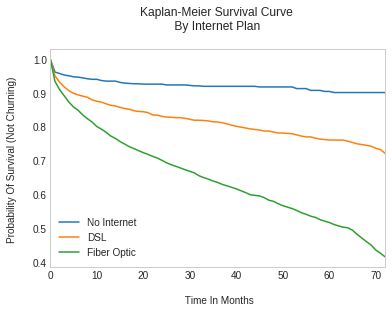

In [0]:
# Fit Kaplan-Meier Curve

kmf_internet = KaplanMeierFitter()

ax = plt.subplot(111)

kmf_internet.fit(noInt_time , noInt_churn, label = 'No Internet')
kmf_internet.survival_function_.plot(ax=ax)

kmf_internet.fit(dsl_time, dsl_churn, label = 'DSL')
kmf_internet.survival_function_.plot(ax=ax)

kmf_internet.fit(fiber_time, fiber_churn, label = 'Fiber Optic')
kmf_internet.survival_function_.plot(ax=ax)

plt.title('Kaplan-Meier Survival Curve \n By Internet Plan \n')
plt.xlabel('\n Time In Months')
plt.ylabel('Probability Of Survival (Not Churning) \n')
plt.grid()
kmf_internet = plt.gcf()

plt.savefig('Churn_byInternet.png', dpi=300, bbox_inches = "tight")

From this survival curve by internet plan, it appears that customers with are more likely to churn compared to those with DSL and no internet.

It is estimated that there is a 20% probability of a Fiber Optic customer churning at 10 months.

### Another Further Works Idea

* Can look at churn for those on fiber optic and those on monthly plans.

In [0]:
# Filter data for those on fiber optic and on monthly plans:

month_fiber_cust = telco_data_km[(telco_data_km['Contract'] == 'Month-to-month') &
                                 (telco_data_km['InternetService'] == 'Fiber optic')]

In [0]:
# Check:

month_fiber_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,True
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,False
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,True
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,True


In [0]:
month_fiber_cust.count()

customerID          2128
gender              2128
SeniorCitizen       2128
Partner             2128
Dependents          2128
tenure              2128
PhoneService        2128
MultipleLines       2128
InternetService     2128
OnlineSecurity      2128
OnlineBackup        2128
DeviceProtection    2128
TechSupport         2128
StreamingTV         2128
StreamingMovies     2128
Contract            2128
PaperlessBilling    2128
PaymentMethod       2128
MonthlyCharges      2128
TotalCharges        2128
Churn               2128
dtype: int64

In [0]:
# Churned values for month-to-month customers & Fiber Optic:

telco_monthly_fiber_churn = month_fiber_cust[(month_fiber_cust['Churn']) &
                                       (month_fiber_cust['InternetService'] == 'Fiber optic')]

telco_monthly_fiber_churn.shape

(1162, 21)

In [0]:
# Set variables for KM curve.
# # Obtain tenure times and Churn events from noInternet, DSL & Fiber Optic

month_fiber_time = month_fiber_cust['tenure']
month_fiber_churn = month_fiber_cust['Churn']


In [0]:
# Fit Kaplan Meier Curve

kmf_month_fiber = KaplanMeierFitter()
kmf_month_fiber.fit(month_fiber_time, event_observed = month_fiber_churn)

<lifelines.KaplanMeierFitter: fitted with 2128 total observations, 966 right-censored observations>

/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:287: FutureWarning: Please use `median_survival_time_` property instead. Future property `median_` will be removed.
  FutureWarning,


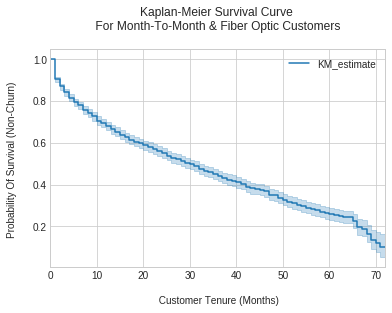

In [0]:
# Plot Of Tenure Time For All Customers

kmf_month_fiber.survival_function_
kmf_month_fiber.cumulative_density_
kmf_month_fiber.median_

kmf_month_fiber.plot_survival_function() # or just kmf.plot()

# Median line:
#plt.axvline(x = np.median(time_km), color = 'green', alpha = 0.3)

# Mean line:
#plt.axvline(x = np.mean(time_km), color = 'black', alpha = 0.2)

# Look at 12 months and 24 months tenure (1 yr and 2 yr contracts)

#plt.axvline(x = 12, color = 'black', alpha = 0.2)

#plt.axvline(x = 24, color = 'black', alpha = 0.2)

plt.xlabel('\n Customer Tenure (Months)')
plt.ylabel('Probability Of Survival (Non-Churn) \n')
plt.title('Kaplan-Meier Survival Curve \n For Month-To-Month & Fiber Optic Customers \n')

plt.savefig('churn_month_fiber.png', dpi=300, bbox_inches = "tight")